In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=24)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Beta functions at the SEM

In [3]:
beta_x = 7.6 #m
beta_y = 1.3 #m

<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\e'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\e'
/tmp/pkruyt/ipykernel_13410/1726847060.py:27: SyntaxWarning: invalid escape sequence '\D'
  label=f'$\Delta \\theta_y$={-angle_values} mrad',color=cycle[i])
/tmp/pkruyt/ipykernel_13410/1726847060.py:52: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\epsilon_x$ [$\mu$m]')


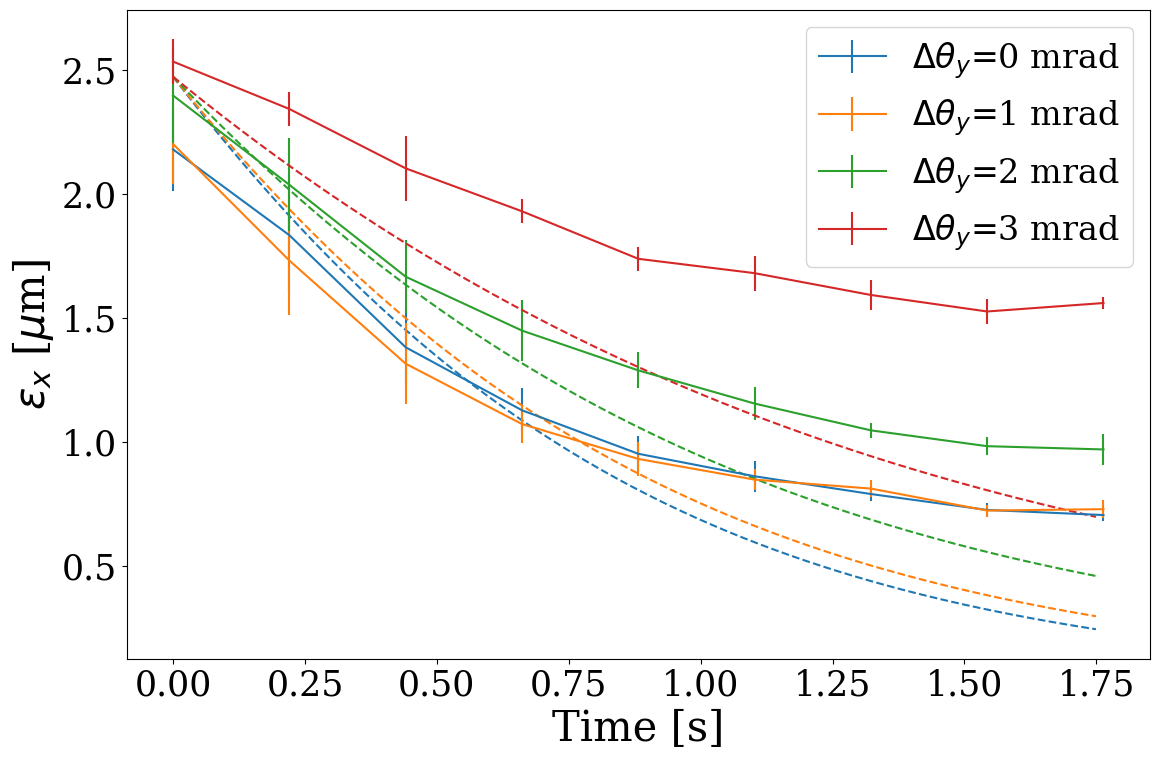

In [4]:
data=np.load('V_angles/angles.npz')

n_steps=data['n_steps']
num_samples=data['num_samples']
delay_list=data['delay_list']
repeated_delay=data['repeated_delay']
angles_list=data['angles_list']

angles_list=[0,-1,-2,-3]

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']


plt.figure(figsize=(12, 8))  # Create a figure for plotting
for i,angle_values in enumerate(angles_list):
    data = np.load(f'results/angle_y/horizontal/ELENA_angle{angle_values}.npz')

    # Extract the data using the keys used when saving
    h_delay_unique = data['h_delay_unique']
    h_delay_unique_shifted = h_delay_unique[1:]
    h_delay_unique_shifted=h_delay_unique_shifted-h_delay_unique_shifted[0]

    means_h = data['means_h']
    stds_h = data['stds_h']
    angle_values = data['angle_values']  # Assuming angle_values contains multiple values or a single value
    plt.errorbar(h_delay_unique_shifted/1000,means_h[1:],yerr=stds_h[1:],
    label=f'$\Delta \\theta_y$={-angle_values} mrad',color=cycle[i])

    data = np.load(f'results/angle_y/angle_{angle_values}.npz')
    # Extract data arrays
    time = data['time']
    norm_emittance_x = data['norm_emittance_x']
    geo_emittance_x = data['geo_emittance_x']
    norm_emittance_y = data['norm_emittance_y']
    geo_emittance_y = data['geo_emittance_y']
    x = data['x']
    std_x=np.std(x,axis=1)
    
    sigma_x = np.sqrt(beta_x*geo_emittance_x)
    sigma_y = np.sqrt(beta_y*geo_emittance_y)

    # sigma_x_all_angles = np.array([np.sqrt(beta_x * geo_emittance_x) for angle in angle_list])
    # sigma_x_95 = np.percentile(sigma_x_all_angles, 95, axis=0)

   
    # Plot the standard deviation of x over time for the current angle
    plt.plot(time, geo_emittance_x * 1e6, color=cycle[i],linestyle='--')

    
    #plt.errorbar(v_delay_unique,means_v,yerr=stds_v,label='vertical')
    plt.xlabel('Time [s]')
    plt.ylabel('$\epsilon_x$ [$\mu$m]')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/Emittance_x_angle_y.png', dpi=300)
plt.show()

<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\e'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\e'
/tmp/pkruyt/ipykernel_13410/761773205.py:27: SyntaxWarning: invalid escape sequence '\D'
  label=f'$\Delta \\theta_y$={-angle_values} mrad',color=cycle[i])
/tmp/pkruyt/ipykernel_13410/761773205.py:52: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\epsilon_y$ [$\mu$m]')


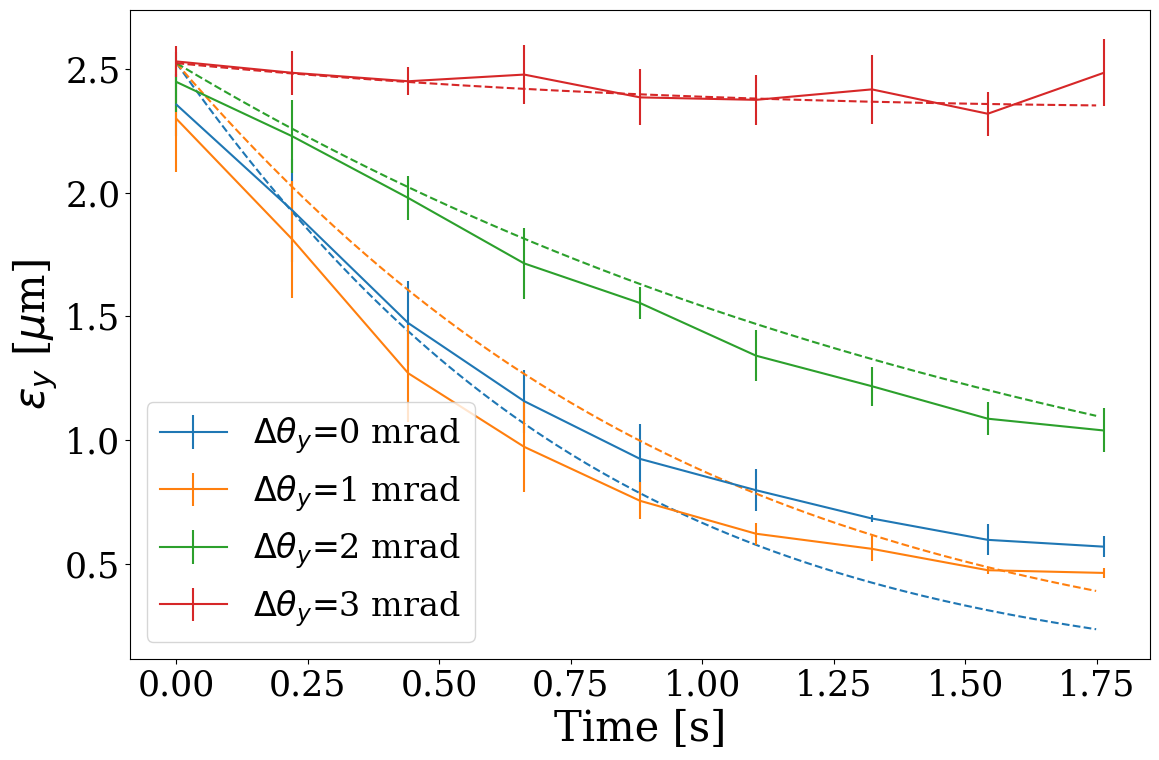

In [6]:
data=np.load('V_angles/angles.npz')

n_steps=data['n_steps']
num_samples=data['num_samples']
delay_list=data['delay_list']
repeated_delay=data['repeated_delay']
angles_list=data['angles_list']

angles_list=[0,-1,-2,-3]

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']


plt.figure(figsize=(12, 8))  # Create a figure for plotting
for i,angle_values in enumerate(angles_list):
    data = np.load(f'results/angle_y/vertical/ELENA_angle{angle_values}.npz')

    # Extract the data using the keys used when saving
    v_delay_unique = data['v_delay_unique']
    v_delay_unique_shifted = v_delay_unique[1:]
    v_delay_unique_shifted=v_delay_unique_shifted-v_delay_unique_shifted[0]

    means_v = data['means_v']
    stds_v = data['stds_v']
    angle_values = data['angle_values']  # Assuming angle_values contains multiple values or a single value
    plt.errorbar(v_delay_unique_shifted/1000,means_v[1:],yerr=stds_v[1:],
    label=f'$\Delta \\theta_y$={-angle_values} mrad',color=cycle[i])

    data = np.load(f'results/angle_y/angle_{angle_values}.npz')
    # Extract data arrays
    time = data['time']
    norm_emittance_x = data['norm_emittance_x']
    geo_emittance_x = data['geo_emittance_x']
    norm_emittance_y = data['norm_emittance_y']
    geo_emittance_y = data['geo_emittance_y']
    x = data['x']
    std_x=np.std(x,axis=1)
    
    sigma_x = np.sqrt(beta_x*geo_emittance_x)
    sigma_y = np.sqrt(beta_y*geo_emittance_y)

    # sigma_x_all_angles = np.array([np.sqrt(beta_x * geo_emittance_x) for angle in angle_list])
    # sigma_x_95 = np.percentile(sigma_x_all_angles, 95, axis=0)

   
    # Plot the standard deviation of x over time for the current angle
    plt.plot(time, geo_emittance_y * 1e6, color=cycle[i],linestyle='--')

    
    #plt.errorbar(v_delay_unique,means_v,yerr=stds_v,label='vertical')
    plt.xlabel('Time [s]')
    plt.ylabel('$\epsilon_y$ [$\mu$m]')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/Emittance_y_angle_y.png', dpi=300)
plt.show()